In [1]:
import warnings
warnings.filterwarnings('ignore')

# 10章 アンケート分析を行うための言語処理１０本ノック

ここでは、まちづくりのアンケートを使って分析していきます。  
主に言語処理を取り扱っていきます。
言語処理特有の処理や、データの持たせ方を学びましょう。

### ノック91：データを読み込んで把握しよう

In [2]:
import pandas as pd
survey = pd.read_csv("survey.csv")
print(len(survey))
survey.head()

86


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [3]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### ノック92：不要な文字を除外してみよう

In [5]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [6]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [7]:
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


In [8]:
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "", regex=True)
survey.head()


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


### ノック93：文字数をカウントしてヒストグラムを表示してみよう

In [9]:
survey["length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <BarContainer object of 10 artists>)

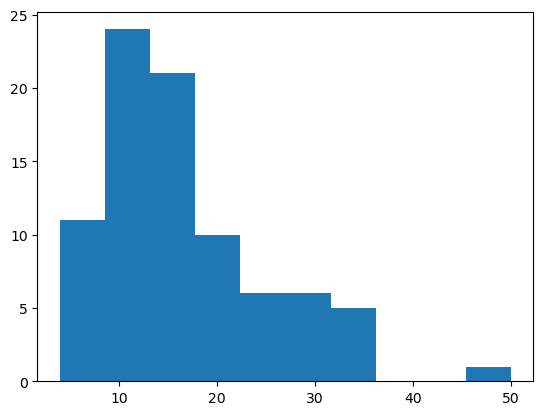

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["length"])

### ノック94：形態素解析で文章を分割してみよう

In [11]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n'

In [12]:
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS': continue
    word_tmp = i.split()[0]
    words_arr.append(word_tmp)
words_arr

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

### ノック95：形態素解析で文章から「動詞・名詞」を抽出してみよう

In [13]:
text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
words

['すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'の\tノ\tノ\tの\t助詞-格助詞\t\t\t',
 'うち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0',
 'EOS']

In [14]:
text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
for i in words:
    if i == 'EOS' or i == '': continue
    word_tmp = i.split()
    words_arr.append(word_tmp)
words_arr

['すもも',
 'も',
 'もも',
 'も',
 'もも',
 'の',
 'うち',
 ['すもも', 'スモモ', 'スモモ', '李', '名詞-普通名詞-一般', '0'],
 ['も', 'モ', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'モモ', '桃', '名詞-普通名詞-一般', '0'],
 ['も', 'モ', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'モモ', '桃', '名詞-普通名詞-一般', '0'],
 ['の', 'ノ', 'ノ', 'の', '助詞-格助詞'],
 ['うち', 'ウチ', 'ウチ', '内', '名詞-普通名詞-副詞可能', '0']]

In [27]:
text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
words_arr = []
parts = ["名詞", "動詞"]
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS' or i == '': continue
    word_tmp = i.split()[0]
    part = i.split()[4].split("-")[0]
    if not (part in parts):continue
    words_arr.append(word_tmp)
words_arr

['すもも', 'もも', 'もも', 'うち']

### ノック96：形態素解析で抽出した頻出する名詞を確認してみよう

In [30]:
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        if word_tmp == '、' or word_tmp == '。' or word_tmp == '？': continue
        part = i.split()[4].split("-")[0]
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', 'BBB', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', 'ｘｘｘ', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理', '施設', '心配', '公害', '市長', '活気', 'アンケート', '

In [17]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,


### ノック97：関係のない単語を除去しよう

In [18]:
stop_words = ["の"]
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

[]


In [19]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,


### ノック98：顧客満足度と頻出単語の関係をみてみよう

In [20]:
stop_words = ["の"]
parts = ["名詞"]
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
        satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()

,words,satisfaction,count


In [21]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,


In [22]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head()

,satisfaction,count
words,,


In [23]:
words_df.sort_values("satisfaction").head()

,satisfaction,count
words,,


### ノック99：アンケート毎の特徴を表現してみよう

In [24]:
parts = ["名詞"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df] ,ignore_index=True)
all_words_df.head()

""


In [25]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

""


### ノック100：類似アンケートを探してみよう

In [26]:
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

子育て支援が嬉しい


IndexError: single positional indexer is out-of-bounds

In [ ]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim",ascending=False).head()

In [ ]:
print(survey["comment"].iloc[2])
print(survey["comment"].iloc[24])
print(survey["comment"].iloc[15])
print(survey["comment"].iloc[33])